In [1]:
import psycopg2
import pandas as pd
import pandas.io.sql as pd_sql
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def connectDB(DB):
    # connect to the PostgreSQL server
    return psycopg2.connect(
        database=DB,
        user="postgres",
        password="Georgetown16",
        host="database-1.c5vispb5ezxg.us-east-1.rds.amazonaws.com",
        port='5432')

def disconnectDB():
    cur.close()
    conn.close()


In [5]:
# connect to "Dataset" DB 
conn = connectDB("Dataset")

# extract everything from 'table_name' into a dataframe
df = pd_sql.read_sql(f"select * from public.\"analysisFeatures\" ", con=conn).reset_index()
pd.set_option('display.max_column',50)
df.head()
   

,index,id_student,code_module,code_presentation,module_domain,module_presentation_length,term,year,num_of_prev_attempts,final_result,pass_fail_ind,reg_period,date_registration,date_unregistration,disability,gender,age_band,region,highest_education,imd_band,studied_credits,b4_sum_clicks,q1_sum_clicks,q2_sum_clicks,q3_sum_clicks,q4_sum_clicks,allclicks,cma_assmt_score,tma_assmt_score,tma_cma_assmt_score,final_exam,total_weight,is_reenrolled,final_exam_score
0,0,3733,DDD,2013J,STEM,261,J,2013,0,Withdrawn,None,QUARTERB4,-68.0,-8.0,N,M,55<=,South Region,HE Qualification,90-100%,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,6516,AAA,2014J,SocialScience,269,J,2014,0,Pass,PASS,QUARTERB4,-52.0,NaN,N,M,55<=,Scotland,HE Qualification,80-90%,60,256.0,790.0,389.0,715.0,641.0,2791.0,0.0,63.5,63.5,0.0,100.0,0.0,0.0
2,2,8462,DDD,2013J,STEM,261,J,2013,0,Withdrawn,None,LONGB4,-137.0,119.0,N,M,55<=,London Region,HE Qualification,30-40%,90,81.0,442.0,123.0,0.0,0.0,646.0,0.0,34.9,34.9,0.0,40.0,0.0,0.0
3,3,8462,DDD,2014J,STEM,262,J,2014,1,Withdrawn,None,QUARTERB4,-38.0,18.0,N,M,55<=,London Region,HE Qualification,30-40%,60,0.0,10.0,0.0,0.0,0.0,10.0,0.0,43.0,43.0,0.0,50.0,4.0,0.0
4,4,11391,AAA,2013J,SocialScience,268,J,2013,0,Pass,PASS,LONGB4,-159.0,NaN,N,M,55<=,East Anglian Region,HE Qualification,90-100%,240,98.0,431.0,99.0,85.0,221.0,934.0,0.0,82.4,82.4,0.0,100.0,0.0,0.0


In [4]:
#count null values of date_unregistration
df['date_unregistration'].isnull().sum()

22521

In [8]:
#count null values of date_unregistration
df['is_reenrolled'].isnull().sum()

6800

In [9]:
# replace NUll values
df['is_reenrolled'] = df['is_reenrolled'].fillna(0)

In [10]:
df = df.drop(['date_unregistration'], axis=1)
df = df.drop(['disability'], axis=1)
df = df.drop(['pass_fail_ind'], axis=1)
df = df.drop(['reg_period'], axis=1)
df = df.drop(['highest_education'], axis=1)
df = df.drop(['module_presentation_length'], axis=1)
df = df.drop(['final_exam'], axis=1)
df = df.drop(['num_of_prev_attempts'], axis=1)
df.head(10)

,index,id_student,code_module,code_presentation,module_domain,term,year,final_result,date_registration,gender,...,q1_sum_clicks,q2_sum_clicks,q3_sum_clicks,q4_sum_clicks,cma_assmt_score,tma_assmt_score,tma_cma_assmt_score,total_weight,is_reenrolled,final_exam_score
0,0,3733,DDD,2013J,STEM,J,2013,Withdrawn,-68.0,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,1,6516,AAA,2014J,SocialScience,J,2014,Pass,-52.0,M,...,790.0,389.0,715.0,641.0,0.00,63.50,63.50,100.0,0.0,0.0
2,2,8462,DDD,2013J,STEM,J,2013,Withdrawn,-137.0,M,...,442.0,123.0,0.0,0.0,0.00,34.90,34.90,40.0,0.0,0.0
3,3,8462,DDD,2014J,STEM,J,2014,Withdrawn,-38.0,M,...,10.0,0.0,0.0,0.0,0.00,43.00,43.00,50.0,4.0,0.0
4,4,11391,AAA,2013J,SocialScience,J,2013,Pass,-159.0,M,...,431.0,99.0,85.0,221.0,0.00,82.40,82.40,100.0,0.0,0.0
5,5,23629,BBB,2013B,SocialScience,B,2013,Fail,-47.0,F,...,105.0,42.0,0.0,0.0,2.00,14.69,16.69,25.0,0.0,0.0
6,6,23632,BBB,2013J,SocialScience,J,2013,Withdrawn,-194.0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
7,7,23698,CCC,2014J,STEM,J,2014,Pass,-110.0,F,...,211.0,125.0,231.0,162.0,18.39,51.58,69.97,100.0,0.0,80.0
8,8,23798,BBB,2013J,SocialScience,J,2013,Distinction,-27.0,M,...,204.0,103.0,152.0,125.0,5.00,84.24,89.24,100.0,0.0,0.0
9,9,24186,GGG,2014B,SocialScience,B,2014,Pass,-25.0,F,...,15.0,27.0,67.0,63.0,0.00,0.00,0.00,0.0,0.0,0.0


In [12]:
df['module_domain'].value_counts()

STEM             21402
SocialScience    11191
Name: module_domain, dtype: int64

In [13]:
df['is_reenrolled'].value_counts()

0.0     32101
3.0       100
4.0        93
2.0        88
1.0        80
5.0        52
6.0        40
7.0        14
11.0        6
9.0         6
8.0         6
10.0        4
12.0        3
Name: is_reenrolled, dtype: int64

In [14]:
df['module_domain'] = df['module_domain'].map({'SocialScience': 0,'STEM': 1})
df['term'] = df['term'].map({'J': 0,'B': 1})
df['year'] = df['year'].map({'2013': 0,'2014': 1})
df['is_reenrolled'] = df['is_reenrolled'].replace(range(1,12), 1)

In [15]:
from sklearn.preprocessing import LabelEncoder


# Extract our X and y data
X = df[df.columns.values.tolist()].sample(frac=0.05, replace=False, random_state=1)
y = df['code_module']

# Encode our target variable
encoder = LabelEncoder().fit(y)
y = encoder.transform(y)

print(X.shape, y.shape)

(1630, 25) (32593,)


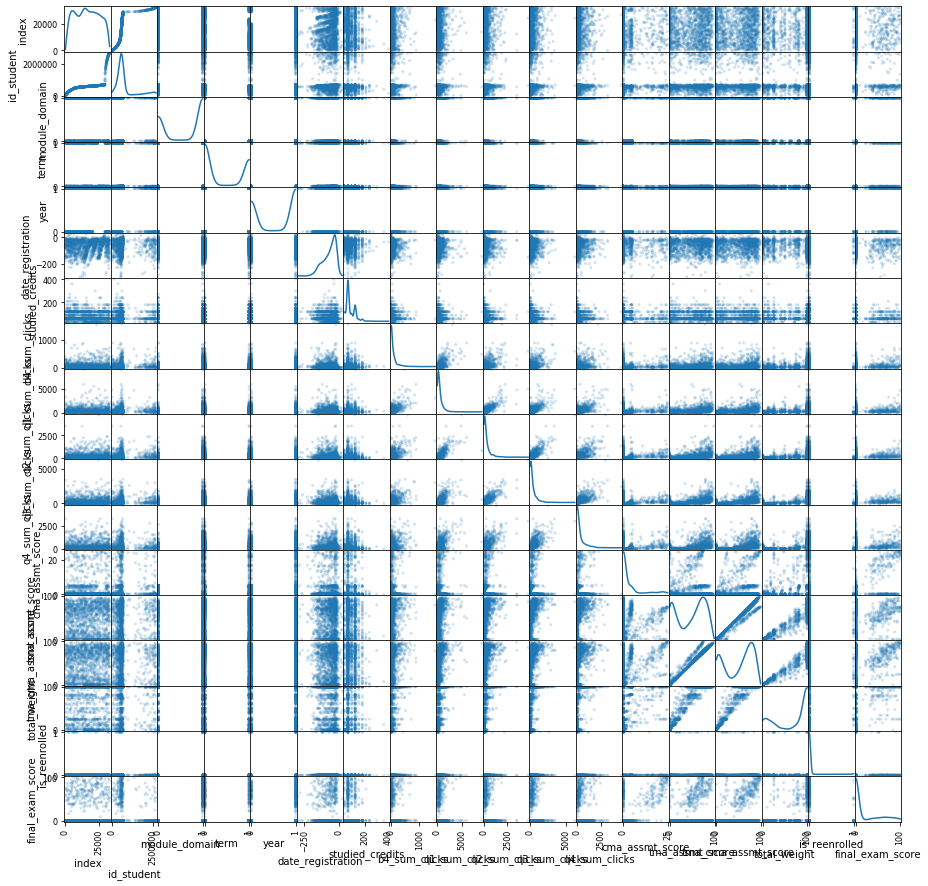

In [19]:
# under construction
# Create a scatter matrix of the dataframe features
from pandas.plotting import scatter_matrix
scatter_matrix(X, alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()

In [ ]:
# write dataframe to database
pd_sql.to_sql(df, "analysisFeatures", con, if_exists='replace')

In [ ]:
disconnectDB()